# DIP LAB 9: Spatial Filters

(688, 688)


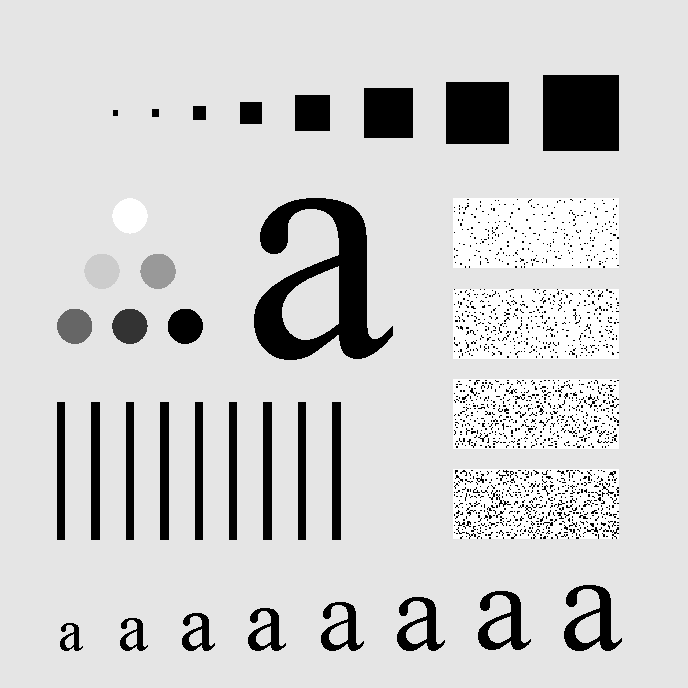

In [1]:
from IPython.display import display
from PIL import Image
image = Image.open('smoothing.tif').convert('RGB')
image = image.convert('L')
print(image.size)
image

### Task 1: Averaging Filter

In [2]:
# General Averaging Filter Function
import numpy as np

def average(filter, image):
    return int((image * filter).sum())

def average_filter(filter, image_array,output_image):
    mask = filter.shape[0]
    width = image_array.shape[0]
    height = image_array.shape[1]
    for y in range(0,height-mask):
        for x in range(0,width-mask):
            value = average(filter,image_array[x:x+mask,y:y+mask])
            value = (value,)
            output_image.putpixel((y,x),value)
    return output_image

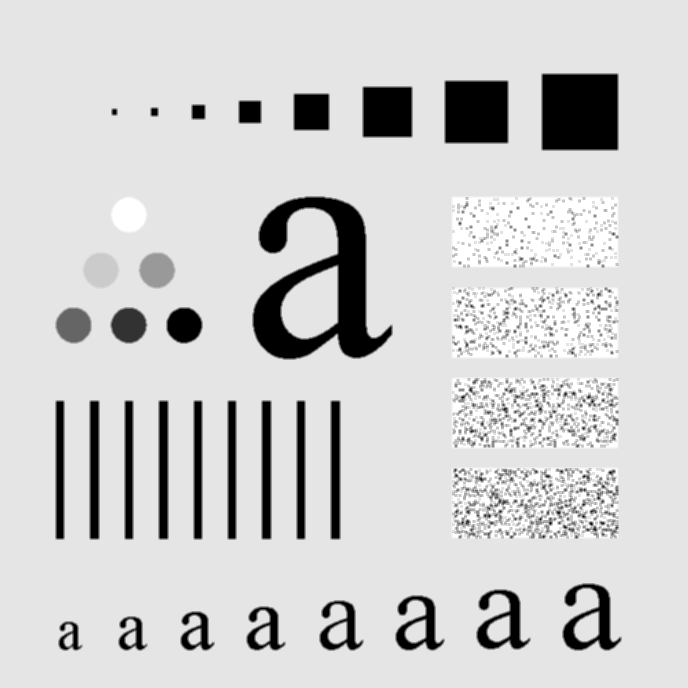

In [3]:
# 3x3 Averaging Filter
image_array = np.asarray(image)
image3x3 = image.copy()
filter3x3 = np.ones((3,3)) / 9
display(average_filter(filter3x3, image_array,image3x3))

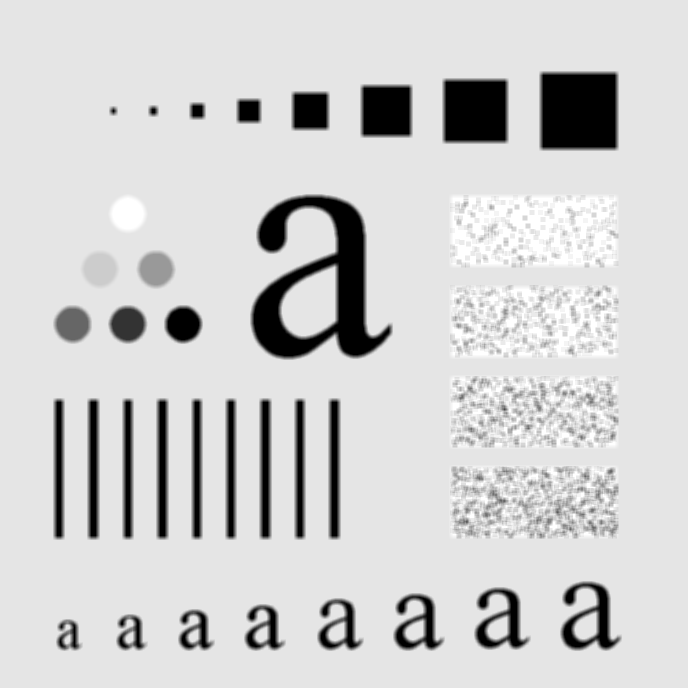

In [4]:
# 5x5 Averaging Filter
image_array = np.asarray(image)
image5x5 = image.copy()
filter5x5 = np.ones((5,5)) / 25
display(average_filter(filter5x5, image_array,image5x5))

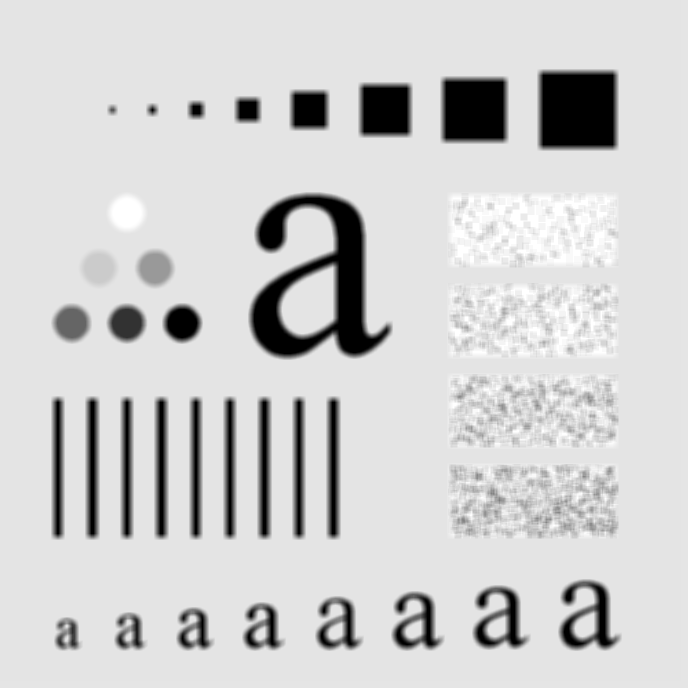

In [5]:
# 7x7 Averaging Filter
image_array = np.asarray(image)
image7x7 = image.copy()
filter7x7 = np.ones((7,7)) / 49
display(average_filter(filter7x7, image_array,image7x7))

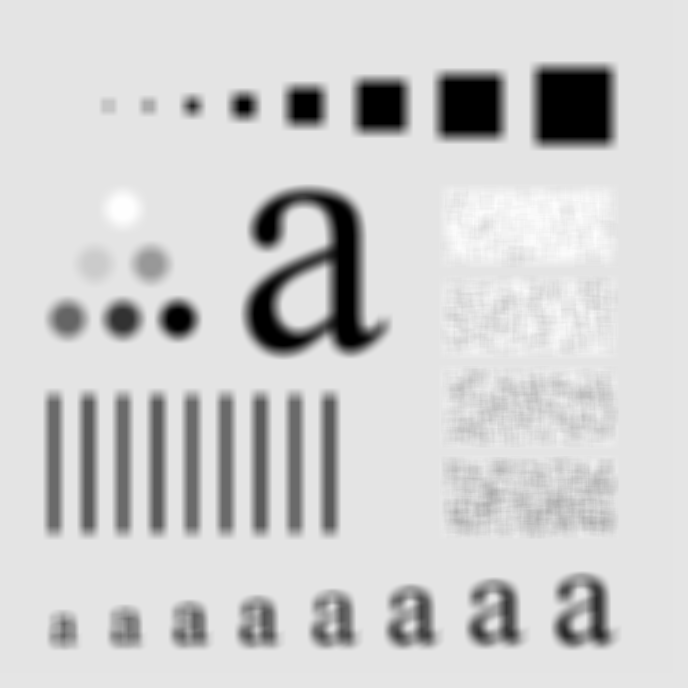

In [6]:
# 15x15 Averaging Filter
image_array = np.asarray(image)
image15x15 = image.copy()
filter15x15 = np.ones((15,15)) / (15 * 15)
display(average_filter(filter15x15, image_array,image15x15))

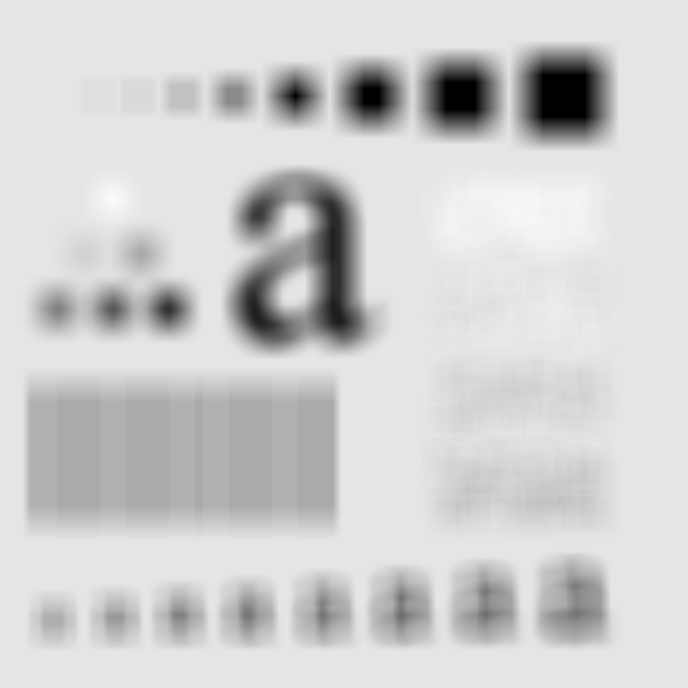

In [7]:
# 35x35 Averaging Filter
image_array = np.asarray(image)
image35x35 = image.copy()
filter35x35 = np.ones((35,35)) / (35 * 35)
display(average_filter(filter35x35, image_array,image35x35))

**What do you observe when increasing the size of the filter and why?**<br>
When we increase the size of averaging filter, we obtain a smoother image with less noise and less high frequency details.

### Weighted Average:

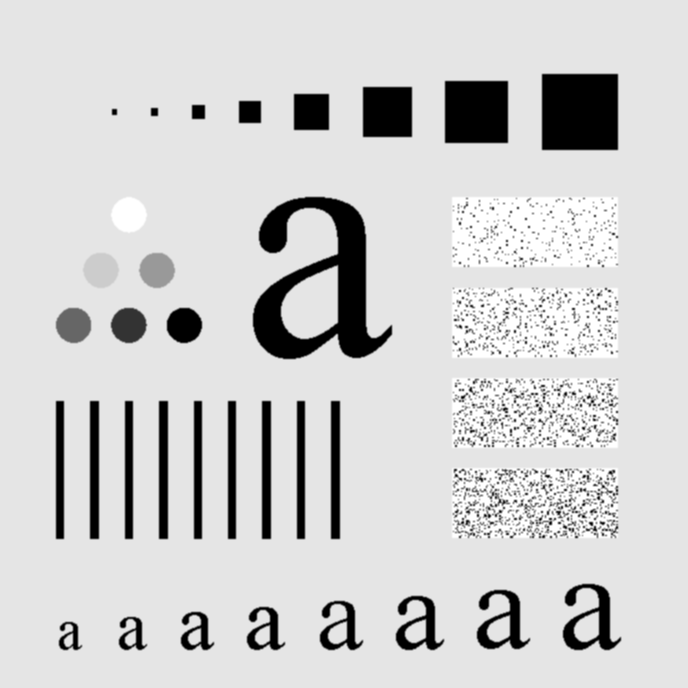

In [8]:
image_array = np.asarray(image)
weighted_image = image.copy()
weighted_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16
average_filter(weighted_filter, image_array,weighted_image)

### Task 2: Gaussian Smoothing

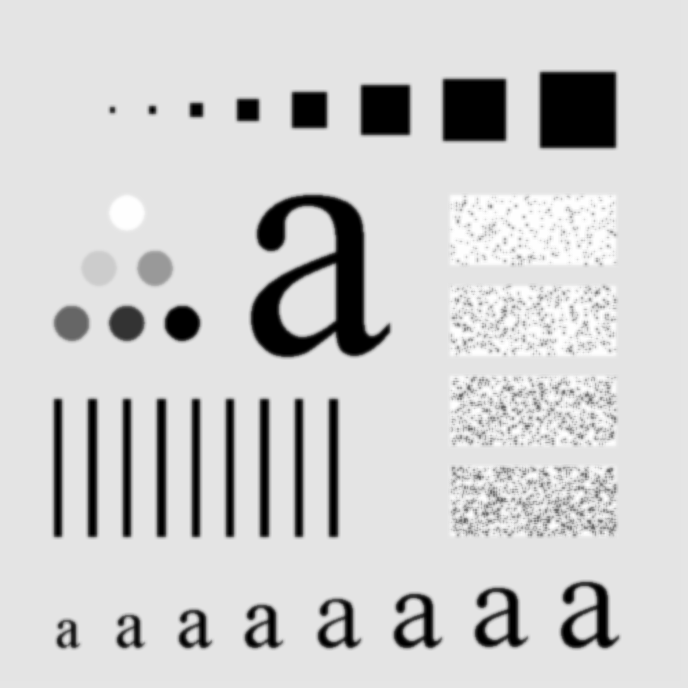

In [9]:
image_array = np.asarray(image)
gaussian_image = image.copy()
gaussian_filter = np.array([[1, 1, 2, 2, 2, 1, 1],
                            [1, 2, 2, 4, 2, 2, 1],
                            [2, 2, 4, 8, 4, 2, 2],
                            [2, 4, 8, 16, 8, 4, 2],
                            [2, 2, 4, 8, 4, 2, 2],
                            [1, 2, 2, 4, 2, 2, 1],
                            [1, 1, 2, 2, 2, 1, 1]])
gaussian_filter = gaussian_filter / gaussian_filter.sum()
average_filter(gaussian_filter, image_array,gaussian_image)

**What impact do you think happen when the value of σ is increased?**<br>
On increasing the value of sigma more weights are focused on the center and less around it. So, more variation is allowed around the mean value.

### Task 3: Unsharp Masking

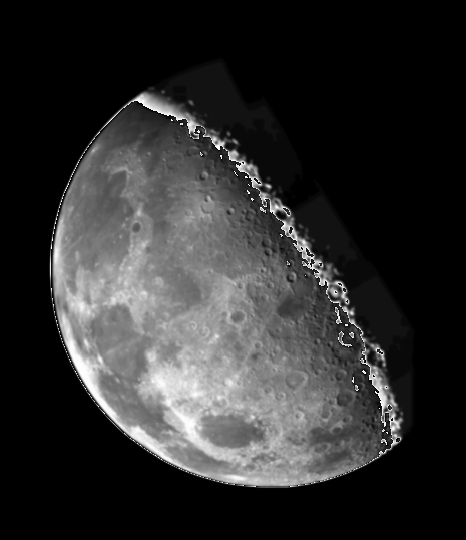

In [10]:
image = Image.open('unsharpmasking.tif').convert('L')
image_array = np.asarray(image)
blur_image = image.copy()
# Unsharp Masking Filter
unsharp_filter = 1 - (np.ones((3,3)) / 9)
# Apply Filter
blur_image = average_filter(unsharp_filter, image_array,blur_image)
# Adding Original Image to Blur Image
unsharp_array = image_array + np.asarray(blur_image)
# Show Image
unsharp_image = Image.fromarray(unsharp_array)
unsharp_image

**Does Unsharp Masking enhance the image?**<br>
Unsharp masking is a sharpening filter that enhance the edges and other high frequency components of the image.

### Task 4: Salt and Pepper Noise

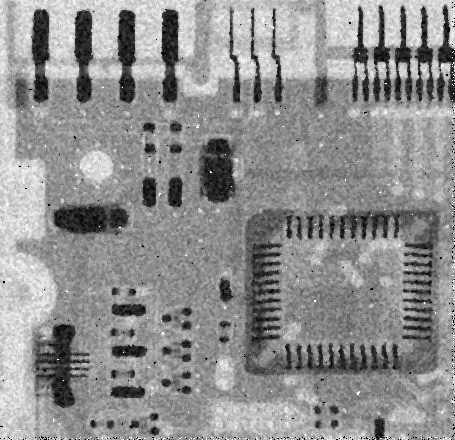

In [11]:
def median_filter(image_array,output_image):
    mask = 3
    width = image_array.shape[0]
    height = image_array.shape[1]
    for y in range(0,height-mask):
        for x in range(0,width-mask):
            value = int(np.median(image_array[x:x+mask,y:y+mask]))
            value = (value,)
            output_image.putpixel((y,x),value)
    return output_image
image = Image.open('saltandpaper.tif').convert('L')
image_array = np.asarray(image)
median_image = image.copy()
median_image = median_filter(image_array,median_image)
median_image

**Which filtering approach do you consider will suit best to remove the said noise?**<br>
Median Filter approach is suitable to remove salt and pepper noise.

### Task 5: Sharpening Filter

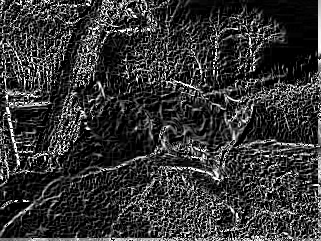

In [12]:
image = Image.open("two_cats.jpg").convert('L')
image_array = np.asarray(image)
vertical_edge_image = image.copy()
horizontal_edge_image = image.copy()
# Detecting Vertical Edges
vertical_filter = np.asarray([[-1,-1,-1],
                              [0, 0, 0],
                              [1, 1, 1]])
vertical_image = average_filter(vertical_filter,image_array,vertical_edge_image)
# Detecting Horizontal Edges
horizontal_filter = vertical_filter.transpose()
horizontal_image = average_filter(horizontal_filter,image_array,horizontal_edge_image)
# Adding Two Edges
edge_array = np.asarray(vertical_image) + np.asarray(horizontal_image)
edge_image = Image.fromarray(edge_array)
edge_image